In [1]:
# import panda
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read Customer Transaction.csv file
df = pd.read_csv(r"C:\Users\amatibag\OneDrive - Genesys Telecommunications Laboratories, Inc\MMDC\Second Year_1st Term\Math for ML Linear Algebra\Data Files\Customer Transaction.csv")
df

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer
...,...,...,...,...,...,...
3195,59f8afe5-173b-4e52-b641-f98183f1a891,3121df10-58e5-4ed4-a05c-b1f12df6bcc7,2023-01-18,892.44,Home & Garden,Bank Transfer
3196,16d0b561-279d-4da9-9aa8-8c5906dff79a,dff4f636-2c55-4237-8c55-efb15b05949b,2024-02-13,431.64,Health & Beauty,Credit Card
3197,34e3f558-622e-4d6b-8d5d-07ab632e1b95,db0a4640-ea96-4fcd-989b-b71ba767529c,2022-12-26,NaN,Home & Garden,PayPal
3198,d83178cf-653d-435c-a7e8-880361dec6e7,89a1c0bc-4d49-4913-bb0f-26bd56b46a34,2022-09-26,343.46,Health & Beauty,Debit Card


## a. Check for duplicate rows and remove them

In [4]:
df = df.drop_duplicates()
df

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer
...,...,...,...,...,...,...
3153,086370e7-8884-47d7-89b0-776401a43e1c,652636b6-5c72-44e1-aefb-6adce412ee75,2023-12-05,974.25,Electronics,Debit Card
3157,7c7df909-aa25-48c7-af9d-6ebe714b28b6,eb26a4f4-5af2-4e25-b1f2-fd0de5583f7b,10/08/2022,50.07,Automotive,Bank Transfer
3164,79fc606a-c02c-4c39-b065-3e88a59b366c,7fbe5cc4-a35e-4e8e-89d7-7b439659b9f6,20/07/2022,272.68,Clothing,Debit Card
3174,6a84f1a7-f636-4300-bd8d-c7f888460829,185ee140-348a-4461-bd40-07a7e8535815,2023-10-09,0,Health & Beauty,PayPal


## b. Identify columns with missing values and decide how to handle them.

In [6]:
df.isnull().sum()

CustomerID           0
TransactionID        0
TransactionDate      0
Amount             283
ProductCategory    282
PaymentMethod        0
dtype: int64

In [7]:
df.isnull().sum().sum()

565

In [8]:
# Create df2 from df
df2 = df.copy()

# Replace FREE values in Amount with '0'
df2['Amount'] = df2['Amount'].replace('Free', 0)

# Replace null values in Amount with the mean and convert to int
df2['Amount'] = pd.to_numeric(df2['Amount'], errors='coerce')  # Convert to numeric, forcing errors to NaN
mean_amount = df2['Amount'].mean()
df2['Amount'] = df2['Amount'].fillna(mean_amount).astype(int)  # Fill NaN and convert to int

# Replace null values in ProductCategory with 'Others'
df2['ProductCategory'] = df2['ProductCategory'].fillna('Others')

In [9]:
df2.isnull().sum()

CustomerID         0
TransactionID      0
TransactionDate    0
Amount             0
ProductCategory    0
PaymentMethod      0
dtype: int64

In [10]:
df2.isnull().sum().sum()

0

In [11]:
df2

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590,Home & Garden,Bank Transfer
...,...,...,...,...,...,...
3153,086370e7-8884-47d7-89b0-776401a43e1c,652636b6-5c72-44e1-aefb-6adce412ee75,2023-12-05,974,Electronics,Debit Card
3157,7c7df909-aa25-48c7-af9d-6ebe714b28b6,eb26a4f4-5af2-4e25-b1f2-fd0de5583f7b,10/08/2022,50,Automotive,Bank Transfer
3164,79fc606a-c02c-4c39-b065-3e88a59b366c,7fbe5cc4-a35e-4e8e-89d7-7b439659b9f6,20/07/2022,272,Clothing,Debit Card
3174,6a84f1a7-f636-4300-bd8d-c7f888460829,185ee140-348a-4461-bd40-07a7e8535815,2023-10-09,0,Health & Beauty,PayPal


## c. Ensure columns have the appropriate data types.

In [13]:
print(df2.dtypes)

CustomerID         object
TransactionID      object
TransactionDate    object
Amount              int32
ProductCategory    object
PaymentMethod      object
dtype: object


In [14]:
# Convert SignupDate to datetime format
df2['TransactionDate'] = pd.to_datetime(df2['TransactionDate'], errors='coerce')

In [15]:
df2.isnull().sum()

CustomerID          0
TransactionID       0
TransactionDate    98
Amount              0
ProductCategory     0
PaymentMethod       0
dtype: int64

In [16]:
# unable to find a way to fix the 98 rows that has different format. Decided to drop the data instead

df2 = df2.dropna()

In [17]:
df2.isnull().sum()

CustomerID         0
TransactionID      0
TransactionDate    0
Amount             0
ProductCategory    0
PaymentMethod      0
dtype: int64

In [18]:
print(df2.dtypes)

CustomerID                 object
TransactionID              object
TransactionDate    datetime64[ns]
Amount                      int32
ProductCategory            object
PaymentMethod              object
dtype: object


In [19]:
df2

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590,Home & Garden,Bank Transfer
...,...,...,...,...,...,...
3113,f05ec030-ac96-417d-a73c-e3ca3adc1a30,f39c8b1d-595a-4656-8108-25981bf3fa14,2024-03-05,252,Electronics,Debit Card
3123,8de3d5b9-1f1a-4bd7-b242-6cb09d7f3609,5fca256b-cd5a-48fa-8b07-37f39adde8c9,2023-05-17,-100,Clothing,Bank Transfer
3153,086370e7-8884-47d7-89b0-776401a43e1c,652636b6-5c72-44e1-aefb-6adce412ee75,2023-12-05,974,Electronics,Debit Card
3174,6a84f1a7-f636-4300-bd8d-c7f888460829,185ee140-348a-4461-bd40-07a7e8535815,2023-10-09,0,Health & Beauty,PayPal


## Exploratory Data Analysis (EDA)

In [21]:
df3 = df2.copy()

#put 2 the decimal for Amount
df3['Amount'] = df2['Amount'].astype(float)
pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [22]:
# add month column
df3['Month'] = df2['TransactionDate'].dt.month_name()

# add year column
df3['Year'] = df2['TransactionDate'].dt.year

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2917 entries, 0 to 3177
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       2917 non-null   object        
 1   TransactionID    2917 non-null   object        
 2   TransactionDate  2917 non-null   datetime64[ns]
 3   Amount           2917 non-null   float64       
 4   ProductCategory  2917 non-null   object        
 5   PaymentMethod    2917 non-null   object        
 6   Month            2917 non-null   object        
 7   Year             2917 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 193.7+ KB


In [24]:
df3.describe()

,TransactionDate,Amount,Year
count,2917,2917.00,2917.00
mean,2023-07-08 01:00:43.195063296,485.23,2023.03
min,2022-07-01 00:00:00,-100.00,2022.00
25%,2023-01-06 00:00:00,242.00,2023.00
50%,2023-07-12 00:00:00,484.00,2023.00
75%,2024-01-10 00:00:00,724.00,2024.00
max,2024-06-30 00:00:00,999.00,2024.00
std,NaN,288.62,0.72


In [25]:
df3.nunique()

CustomerID         1835
TransactionID      2909
TransactionDate     716
Amount              917
ProductCategory       6
PaymentMethod         4
Month                12
Year                  3
dtype: int64

In [26]:
df3.sort_values(by="TransactionDate")

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod,Month,Year
1049,404f9aca-5c0b-484f-a4ec-65ef1b401718,38d5af45-0409-4d32-8dd9-87265f4aba52,2022-07-01,18.00,Others,Debit Card,July,2022
1069,576fc0ef-5017-4d85-ba43-136e65f10a7f,860d6e54-0366-424d-9df1-3ea96b03f207,2022-07-01,699.00,Others,Bank Transfer,July,2022
523,1a8a0568-f287-49ae-b1e0-3bbba67c15b0,42a61ca2-c5d3-41be-946a-84fd42891492,2022-07-01,254.00,Home & Garden,Debit Card,July,2022
906,1ccb71e6-8f53-423f-808d-a2023aa0c5a8,e4105300-4326-4494-8ecc-267319351d56,2022-07-01,377.00,Home & Garden,Bank Transfer,July,2022
328,c448b2f5-80a5-4fde-8144-8bea32bc3618,16c90584-1b6f-4d6e-ba22-32407b163757,2022-07-01,983.00,Health & Beauty,Credit Card,July,2022
...,...,...,...,...,...,...,...,...
1715,2d76d24b-3693-4802-8014-9ea47fb95597,c8ae4822-8847-4d10-8ee1-c6fae6e0a110,2024-06-29,954.00,Home & Garden,PayPal,June,2024
2203,8f4bfd5c-d32d-49bb-a995-7535553847cf,76064e68-4b27-459a-84f2-c4867f4dba61,2024-06-29,484.00,Home & Garden,Debit Card,June,2024
2321,c6789ac7-81c7-469a-a613-fe1fe1487953,f6e7b8df-5e63-4a67-abf8-f29508cdfbaf,2024-06-29,969.00,Automotive,Bank Transfer,June,2024
2796,066f3633-6af2-42a0-9678-862f00b57b78,3fde0082-d700-41ba-87fc-7c3d610baf01,2024-06-30,147.00,Clothing,PayPal,June,2024


In [27]:
# Frequency counts for categorical variables in Customer Transactions
product_category_counts = df2['ProductCategory'].value_counts()
payment_method_counts = df2['PaymentMethod'].value_counts()
month_counts = df3['Month'].value_counts()
year_counts = df3['Year'].value_counts()

print("Product Category Counts:\n", product_category_counts)
print("Payment Method Counts:\n", payment_method_counts)
print("Month Counts:\n", month_counts)
print("Month Counts:\n", year_counts)

Product Category Counts:
 ProductCategory
Clothing           562
Electronics        548
Automotive         516
Home & Garden      513
Health & Beauty    508
Others             270
Name: count, dtype: int64
Payment Method Counts:
 PaymentMethod
Debit Card       742
Credit Card      733
PayPal           722
Bank Transfer    720
Name: count, dtype: int64
Month Counts:
 Month
May          285
March        261
January      256
July         250
October      249
December     248
September    246
February     238
April        234
November     220
August       216
June         214
Name: count, dtype: int64
Month Counts:
 Year
2023    1423
2024     784
2022     710
Name: count, dtype: int64


## Charts

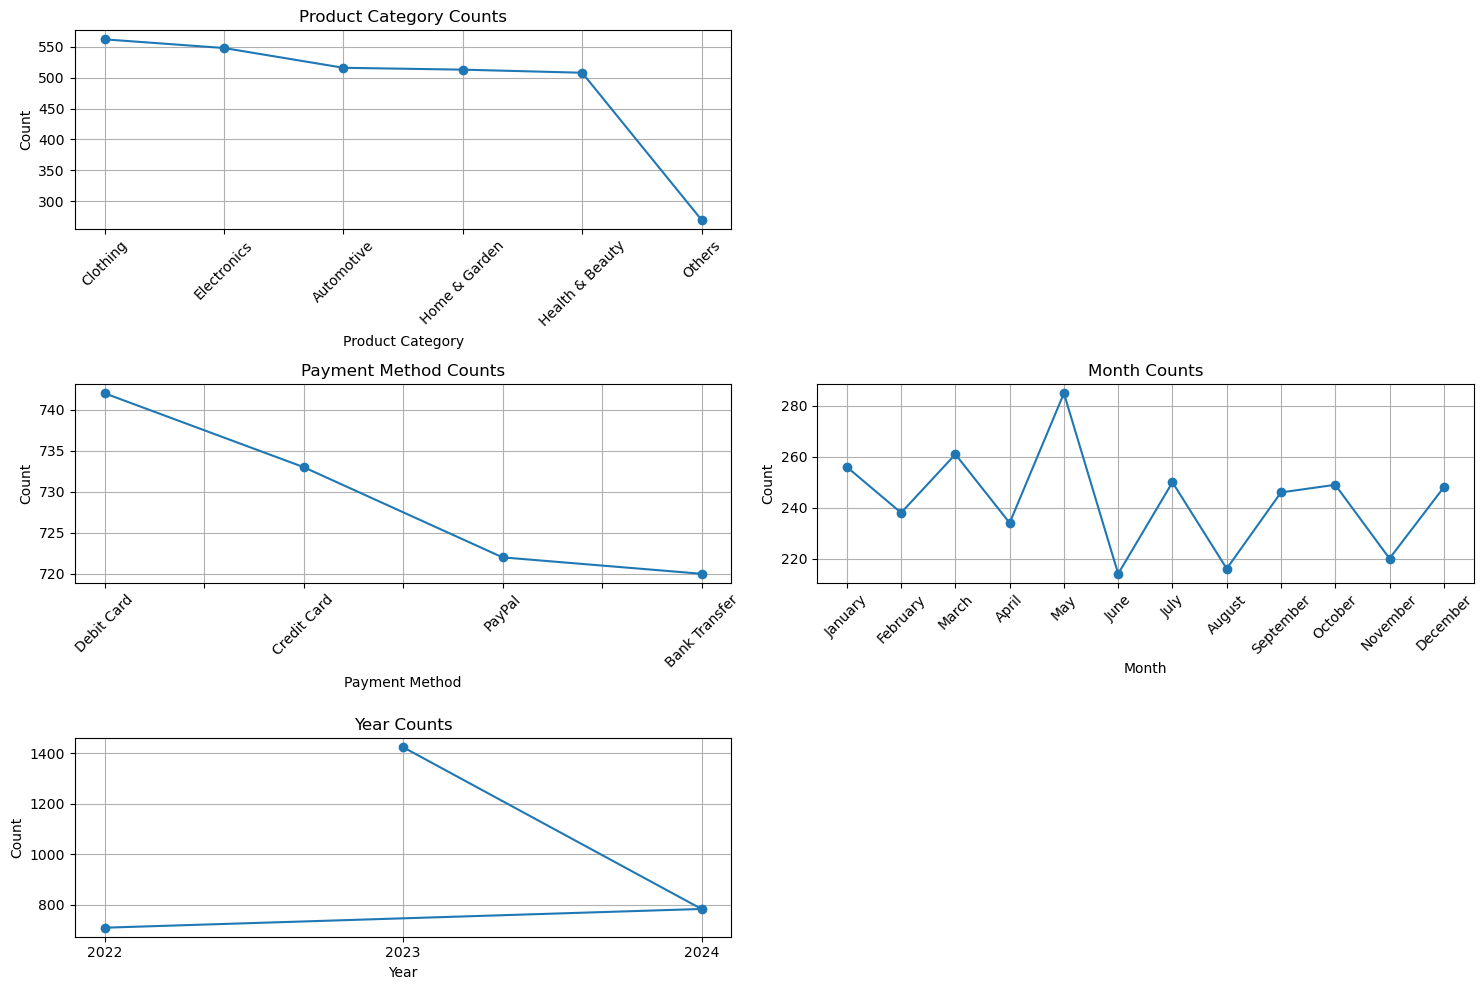

In [30]:
# Frequency counts for categorical variables
product_category_counts = df2['ProductCategory'].value_counts()
payment_method_counts = df2['PaymentMethod'].value_counts()
month_counts = df3['Month'].value_counts()
year_counts = df3['Year'].value_counts()

# Ensure month counts are sorted properly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
month_counts = month_counts.reindex(month_order).fillna(0)  # Reindex to ensure proper order

# Set up the plots
plt.figure(figsize=(15, 10))

# Product Category Counts Line Chart
plt.subplot(3, 2, 1)
product_category_counts.plot(kind='line', marker='o')
plt.title('Product Category Counts')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Payment Method Counts Line Chart
plt.subplot(3, 2, 3)
payment_method_counts.plot(kind='line', marker='o')
plt.title('Payment Method Counts')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Month Counts Line Chart
plt.subplot(3, 2, 4)
month_counts.plot(kind='line', marker='o')
plt.title('Month Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(len(month_order)), labels=month_order, rotation=45)  # Set ticks and labels
plt.grid()

# Year Counts Line Chart
plt.subplot(3, 2, 5)
year_counts.plot(kind='line', marker='o')
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(year_counts.index)  # Ensure all years are shown
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()